In [2]:
from finlab.data import Data

# 可以從 data 中讀取資料
data = Data()

In [3]:
# 從 close, high, low 取從最新的一筆資料往前算，2000筆資料
close = data.get('收盤價', 2000)
high = data.get('最高價', 2000)
low = data.get('最低價', 2000)

<AxesSubplot:xlabel='date'>

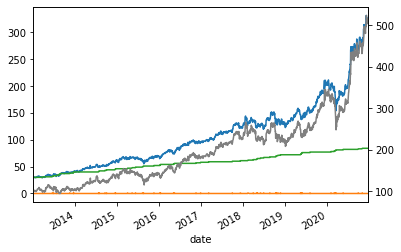

In [4]:
import talib
import pandas as pd

stock_id='2330'
# 利用 talib 來計算 0050 這檔股票的指標
kd = talib.STOCH(high[stock_id].ffill().values, 
                 low[stock_id].ffill().values, 
                 close[stock_id].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1)

# 將 kd 值 分別轉換成 k、d 兩條 series
k = pd.Series(kd[0], index=close[stock_id].index)
d = pd.Series(kd[1], index=close[stock_id].index)

# & 代表 「且」 的意思，這邊的條件就是
# k.shift(1) 可以想成「昨天」的意思，同理 k.shift(2) 就是前天
# 當（今天的 k > d ）且 （昨天的 k < d） 且 （今天的 k < 30） 時，買入

buy = (k > d) & (k.shift(1) < d.shift(1)) & (k < 30)

# 起始資金為 30 萬，這段可以參考「老師的話」當中的範例
arr = [30]
for v, p in zip(buy[1:], close[stock_id].shift(-2)/close[stock_id].shift(-1)):
    arr.append(arr[-1]*p + v)

# 畫圖
%matplotlib inline

# 先畫出 0050 收盤價
close[stock_id].plot(secondary_y=True, color='gray')

# 畫出投資獲利
pd.Series(arr, index=close[stock_id].index).plot()

# 畫出買入的時間點
buy.astype(int).plot()

# 畫出一樣的金額假如放在銀行，的資產變化
(buy.astype(int).cumsum() + 30).plot()

In [13]:
from strategies.Finlab策略 import strategy
from finlab.data import Data
data = Data()

strategy(data)

stock_id
1217    True
1219    True
1220    True
1541    True
1558    True
1587    True
1616    True
1617    True
1618    True
1709    True
1712    True
1735    True
1806    True
1817    True
2010    True
2013    True
2028    True
2062    True
2069    True
2402    True
2427    True
2430    True
2431    True
2440    True
2453    True
2459    True
2461    True
2472    True
2476    True
2546    True
        ... 
3013    True
3015    True
3032    True
3033    True
3311    True
3312    True
3528    True
3550    True
3605    True
3617    True
3694    True
4306    True
4439    True
4720    True
4722    True
4739    True
4961    True
4989    True
5515    True
5538    True
5906    True
6112    True
6201    True
6281    True
6674    True
8103    True
8215    True
8261    True
8411    True
9924    True
Length: 67, dtype: bool